**Objective**

You will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

**Additional Notes**

- Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import calendar

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

In [6]:
df_train = pd.read_csv('train.csv')
df_store = pd.read_csv('stores.csv')
df_holiday = pd.read_csv('holidays_events.csv')
df_oil = pd.read_csv('oil.csv')
df_trans = pd.read_csv('transactions.csv')

In [3]:
df_holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [7]:
# copying of train data and merging other data
df_train1 = df_train.merge(df_holiday, on = 'date', how='left')
df_train1 = df_train1.merge(df_oil, on = 'date', how='left')
df_train1 = df_train1.merge(df_store, on = 'store_nbr', how='left')
df_train1 = df_train1.merge(df_trans, on = ['date', 'store_nbr'], how='left')
df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

In [22]:
df = df_train1.dropna()
df

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions
73062,73062,2013-02-11,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13,396.0
73063,73063,2013-02-11,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13,396.0
73064,73064,2013-02-11,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13,396.0
73065,73065,2013-02-11,1,BEVERAGES,172.000,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13,396.0
73066,73066,2013-02-11,1,BOOKS,0.000,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13,396.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0


In [ ]:
df['date']= pd.to_datetime(df['date'])

In [30]:
df.drop(['id'],inplace=True,axis=1)

In [31]:
df.dtypes

date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
holiday_type            object
locale                  object
locale_name             object
description             object
transferred             object
dcoilwtico             float64
city                    object
state                   object
store_type              object
cluster                  int64
transactions           float64
dtype: object

In [39]:
results_store = df.groupby(df['date'].dt.month).sum()
results_store

,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions
date,,,,,,
1,42867,6.577634e+05,4949,83508.48,13728,3194697.0
2,312543,4.148323e+06,29009,671669.13,98868,17826006.0
3,220341,3.623619e+06,21356,556827.81,70026,13779447.0
4,1179453,1.784631e+07,160913,2468128.74,371151,71574723.0
5,1107942,1.701209e+07,246037,2252412.36,347292,67012473.0
6,734184,7.396725e+06,37191,2329555.14,236346,41540235.0
7,775764,9.735432e+06,59479,2501628.36,249513,45738429.0
8,685410,9.472587e+06,107142,1489604.49,215028,40832880.0
9,92433,1.303022e+06,18011,155409.21,28710,4948482.0


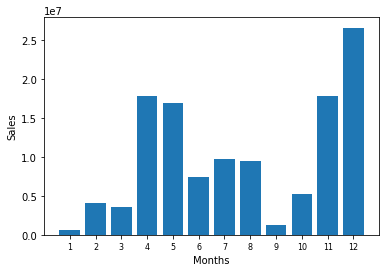

In [43]:
#cities = All_data['City'].unique()

#we need to make the cities in the same order as the sales for consistency

sales = [sale for sale,df in df.groupby(df['date'].dt.month)]

plt.bar(sales,results_store['sales'])
plt.xticks(sales,size=8)
plt.ylabel('Sales')
plt.xlabel('Months')

plt.show()

In [45]:
results_ = df.groupby(df['family']).sum()
results_

,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions
family,,,,,,
AUTOMOTIVE,245347,5.851300e+04,570,582532.3,77572,15775136.0
BABY CARE,245347,1.146000e+03,8,582532.3,77572,15775136.0
BEAUTY,245347,3.628400e+04,1291,582532.3,77572,15775136.0
BEVERAGES,245347,2.389675e+07,132815,582532.3,77572,15775136.0
BOOKS,245347,7.810000e+02,0,582532.3,77572,15775136.0
BREAD/BAKERY,245347,4.310659e+06,28796,582532.3,77572,15775136.0
CELEBRATION,245347,9.627200e+04,800,582532.3,77572,15775136.0
CLEANING,245347,1.034998e+07,78010,582532.3,77572,15775136.0
DAIRY,245347,6.890799e+06,95120,582532.3,77572,15775136.0


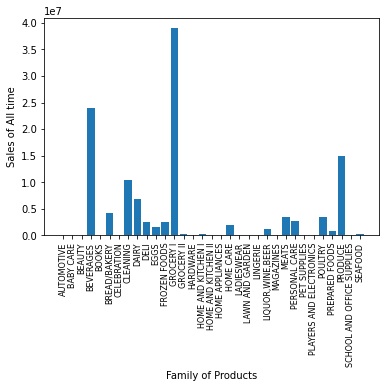

In [47]:
#cities = All_data['City'].unique()

#we need to make the cities in the same order as the sales for consistency

families = [fam for fam,df in df.groupby(df['family'])]

plt.bar(families,results_['sales'])
plt.xticks(families,rotation='vertical',size=8)
plt.ylabel('Sales of All time')
plt.xlabel('Family of Products')

plt.show()

In [14]:
# data
df_st_sa = df.groupby('store_type').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
df_fa_sa = df.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:10]
df_cl_sa = df.groupby('cluster').agg({"sales" : "mean"}).reset_index() 
# chart color
df_fa_sa['color'] = '#496595'
df_fa_sa['color'][2:] = '#c6ccd8'
df_cl_sa['color'] = '#c6ccd8'

# chart
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3], vertical_spacing=0, horizontal_spacing=0.02,
                    subplot_titles=("Top 10 Highest Product Sales", "Highest Sales in Stores", "Clusters Vs Sales"))

fig.add_trace(go.Bar(x=df_fa_sa['sales'], y=df_fa_sa['family'], marker=dict(color= df_fa_sa['color']),
                     name='Family', orientation='h'), 
                     row=1, col=1)
fig.add_trace(go.Pie(values=df_st_sa['sales'], labels=df_st_sa['store_type'], name='Store type',
                     marker=dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']), hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label'), 
                    row=1, col=2)
fig.add_trace(go.Bar(x=df_cl_sa['cluster'], y=df_cl_sa['sales'], 
                     marker=dict(color= df_cl_sa['color']), name='Cluster'), 
                     row=2, col=1)
# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_cl_sa.cluster, ticktext=[i for i in range(1,17)], row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=500, bargap=0.2,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Average Sales Analysis",
                  template="plotly_white",
                  title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

In [54]:
df_train.drop('id',inplace=True,axis=1)


In [52]:
df_test = pd.read_csv('test.csv')
df_test.drop('id',inplace=True,axis=1)
df_test

,date,store_nbr,family,onpromotion
0,2017-08-16,1,AUTOMOTIVE,0
1,2017-08-16,1,BABY CARE,0
2,2017-08-16,1,BEAUTY,2
3,2017-08-16,1,BEVERAGES,20
4,2017-08-16,1,BOOKS,0
...,...,...,...,...
28507,2017-08-31,9,POULTRY,1
28508,2017-08-31,9,PREPARED FOODS,0
28509,2017-08-31,9,PRODUCE,1
28510,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [66]:
cols = df_train.columns.tolist()
cols

['date', 'store_nbr', 'family', 'sales', 'onpromotion']

In [67]:
cols = cols[-1:] + cols[:-1]
cols

['onpromotion', 'date', 'store_nbr', 'family', 'sales']

In [68]:
df_train = df_train[cols]

In [69]:
df_train

,onpromotion,date,store_nbr,family,sales
0,0,2013-01-01,1,AUTOMOTIVE,0.000
1,0,2013-01-01,1,BABY CARE,0.000
2,0,2013-01-01,1,BEAUTY,0.000
3,0,2013-01-01,1,BEVERAGES,0.000
4,0,2013-01-01,1,BOOKS,0.000
...,...,...,...,...,...
3000883,0,2017-08-15,9,POULTRY,438.133
3000884,1,2017-08-15,9,PREPARED FOODS,154.553
3000885,148,2017-08-15,9,PRODUCE,2419.729
3000886,8,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000


In [77]:
train = df_train.drop('date',axis=1)
train.iloc[:,:-1].values

array([[0, 1, 'AUTOMOTIVE'],
       [0, 1, 'BABY CARE'],
       [0, 1, 'BEAUTY'],
       ...,
       [148, 9, 'PRODUCE'],
       [8, 9, 'SCHOOL AND OFFICE SUPPLIES'],
       [0, 9, 'SEAFOOD']], dtype=object)

In [91]:
ids = [i for i in range(1,34)]

df_t = pd.DataFrame(list(zip(ids, df_train['family'])),
                  columns=['Id_family', 'family'])
df_t


,Id_family,family
0,1,AUTOMOTIVE
1,2,BABY CARE
2,3,BEAUTY
3,4,BEVERAGES
4,5,BOOKS
5,6,BREAD/BAKERY
6,7,CELEBRATION
7,8,CLEANING
8,9,DAIRY
9,10,DELI


In [92]:
df_ff = df_train.merge(df_t, on = 'family', how='left')
df_ff

,onpromotion,date,store_nbr,family,sales,Id_family
0,0,2013-01-01,1,AUTOMOTIVE,0.000,1
1,0,2013-01-01,1,BABY CARE,0.000,2
2,0,2013-01-01,1,BEAUTY,0.000,3
3,0,2013-01-01,1,BEVERAGES,0.000,4
4,0,2013-01-01,1,BOOKS,0.000,5
...,...,...,...,...,...,...
3000883,0,2017-08-15,9,POULTRY,438.133,29
3000884,1,2017-08-15,9,PREPARED FOODS,154.553,30
3000885,148,2017-08-15,9,PRODUCE,2419.729,31
3000886,8,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,32


In [93]:
X = df_ff.drop(['date','family','sales'],axis=1).values
y = df_ff['sales'].values

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = 0, shuffle=False)